**Caderno referente ao projeto da disciplina Sistemas de Controle II - UFRN.**

### Grupo de Trabalho
* Christian Erick Andrade Paiva
* Ianca Maria Leite da Costa
* José Adriano Brito de Lima

## Configuração do ambiente

In [1]:
!pip install control

In [2]:
from numpy import * # package for numerical calculations
from pylab import * # package for graphics
from control import * # package for control theory calculations
from control.matlab import * # package for control theory calculations
ion() # display graphics automatically

In [3]:
sys = tf([2], [1, 0.5, 0]) # Define a transfer function
print(sys)


     2
-----------
s^2 + 0.5 s



(array([-0.5,  0. ]), array([], dtype=float64))

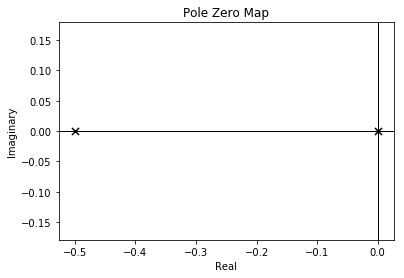

In [4]:
pzmap(sys)

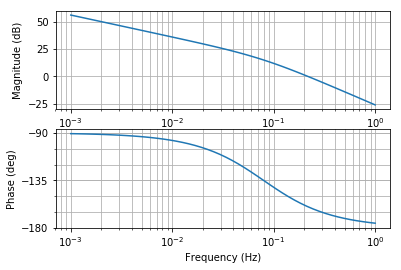

In [5]:
mag, phase, omega = bode(sys)

In [6]:
gm, pm, wg, wp = margin(sys)

Margem de ganho **infinita**

In [7]:
gm

inf

Margem de fase

In [8]:
pm

20.040400498694623

Frequência para a margem de ganho

In [9]:
wg

nan

Frequência para a margem de fase

In [10]:
wp

1.3707306236949603

Requisitos do sistema após a inserção do controlador: <br> <br>
gm -> 6dB <br>
pm -> 30 degree <br>
wp -> 3

In [11]:
pm_new = 60

In [12]:
wp_new = 3

Fase [rad] do sistema para a w=3

In [13]:
sys_3j = evalfr(sys, 3j)
new_phase = np.angle(sys_3j)
new_phase

-2.976443976175166

Fase em graus

In [14]:
new_phase = np.angle(sys_3j,deg=True)
new_phase

-170.53767779197437

Nova margem de fase:

In [15]:
mf = 180+new_phase
mf

9.462322208025626

Não satisfaz nosso requisito de uma margem de fase de 60graus. Vamos ver com quanto o controlador terá que contribuir:

In [16]:
deficit = pm_new - mf
deficit

50.537677791974374

deficit = np.arctan(tau_d*wp_new)

In [17]:
tau_d = np.tan(np.deg2rad(deficit))/wp_new

In [18]:
tau_d

0.40490787757624686

In [19]:
print(1/tau_d)

2.469697566730332


Para garantir fcg = wp_new temos que:

20 = (0-20*log(Kc))/(log(wp_new)-log(1/tau_d))

In [20]:
kc = 0.8232325222434440